In [1]:
#by using random forest
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the CSV File
EV=pd.read_csv(r"C:\Users\VICTUS\Downloads\EV_Dataset.csv")
EV

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
1,2014,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
2,2014,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0
3,2014,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
4,2014,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0
...,...,...,...,...,...,...,...,...
96840,2023,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1
96841,2023,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5
96842,2023,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0
96843,2023,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0


In [3]:
EV.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
1,2014,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
2,2014,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0
3,2014,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
4,2014,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0


In [4]:
# Convert 'Date' column to datetime format
EV['Date'] = pd.to_datetime(EV['Date'], format='%d/%m/%Y')

# Check for missing values
EV.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

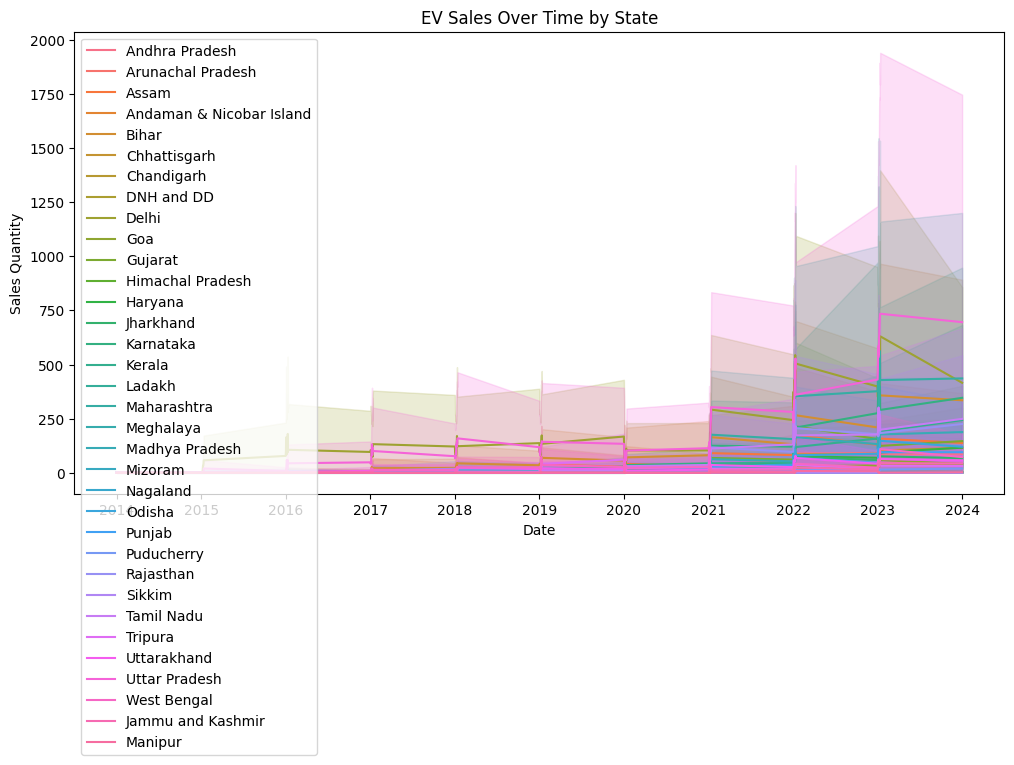

In [5]:
# Plot EV sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=EV, x='Date', y='EV_Sales_Quantity', hue='State')
plt.title('EV Sales Over Time by State')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend(loc='upper left')
plt.show()

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_16540\1458118154.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=EV, x='Vehicle_Category', y='EV_Sales_Quantity', estimator=sum, ci=None)


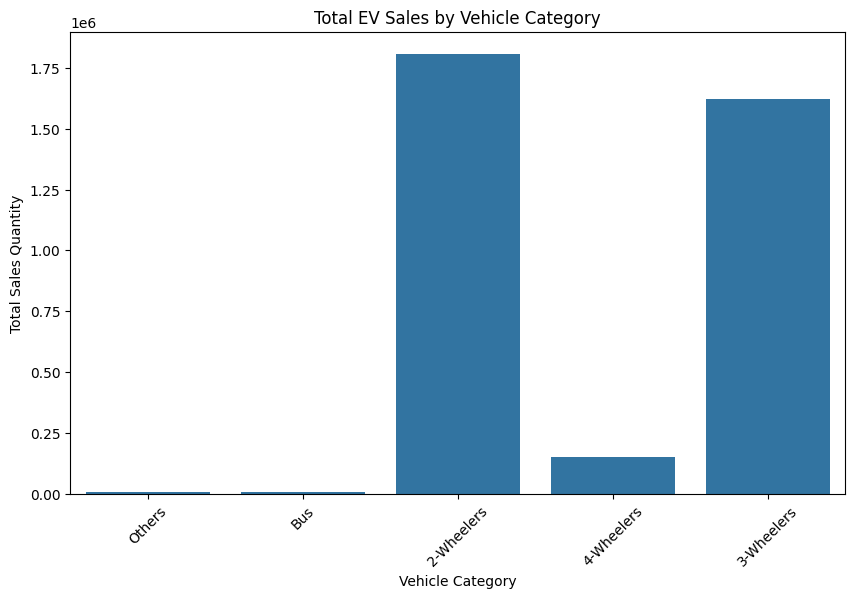

In [6]:
# Plot EV sales by vehicle category
plt.figure(figsize=(10, 6))
sns.barplot(data=EV, x='Vehicle_Category', y='EV_Sales_Quantity', estimator=sum, ci=None)
plt.title('Total EV Sales by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45)
plt.show()

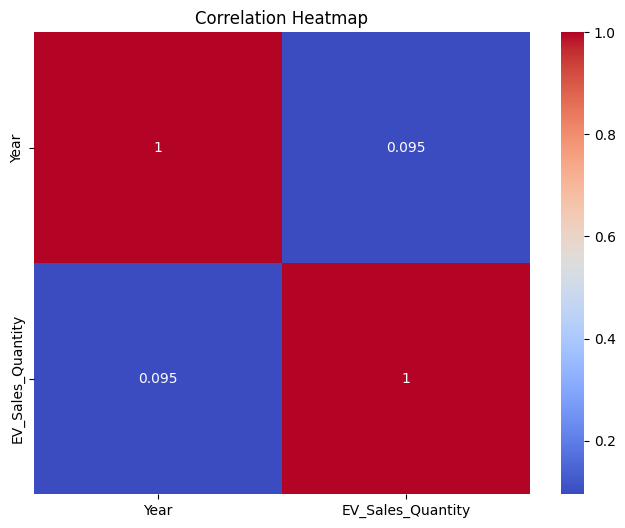

In [7]:
# Select only numeric columns for correlation analysis
numeric_df = EV.select_dtypes(include=[np.number])

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Prepare the data for modeling
X = EV.drop(columns=['EV_Sales_Quantity', 'Date'])
X = pd.get_dummies(X, drop_first=True)
y = EV['EV_Sales_Quantity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

13.809078940575144